In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp, expm1, log
from numpy import amin,amax,zeros,ceil
import matplotlib.pyplot as plt
from operator import itemgetter

In [2]:
Data = pd.read_excel('S&P500.xlsx', usecols="F,G")
Data1 = pd.read_excel('DJIA.xlsx', usecols="F,G")
Data2 = pd.read_excel('SSEC.xlsx', usecols="F,G")

In [3]:

x=np.array(Data['Price'])
y=np.array(Data['Volume'])

x1=np.array(Data1['Price'])
y1=np.array(Data1['Volume'])

x2=np.array(Data2['Price'])
y2=np.array(Data2['Volume'])

print(x)
print(y)
print("-----------")
print(x1)
print(y1)
print("-----------")
print(x2)
print(y2)

[ 987.47998  1002.630005 1005.650024 ... 3020.969971 3013.179932
 2980.379883]
[5139070000 5603440000 5713700000 ... 3203710000 3634330000 4623430000]
-----------
[ 9171.610352  9286.55957   9320.19043  ... 27221.349609 27198.019531
 26864.269531]
[265570000 221690000 195990000 ... 250850000 293250000 385150000]
-----------
[3462.590088 3471.441895 3428.500977 ... 3287.705078 3271.511963
 3331.521973]
[200800 211400 202600 ... 179800 163500 205800]


In [4]:
price_markets =pd.read_excel('S&P500.xlsx', usecols="F")
price_markets1=pd.read_excel('DJIA.xlsx', usecols="F")
price_markets2=pd.read_excel('SSEC.xlsx', usecols="F")

In [5]:
def price_return(price_markets):
    ret=[]
    for i in range(1,len(price_markets)):
        ret.append(log(price_markets.iloc[i])-log(price_markets.iloc[i-1]))
    return ret


In [6]:
r=price_return(price_markets)
r1=price_return(price_markets1)
r2=price_return(price_markets2)

In [7]:
 def simple_pdf(data,delta) :
        down_limit = int(min(data)/delta)*delta
        up_limit = int(max(data)/delta)*delta
        pdf = np.zeros(int((up_limit-down_limit)/delta)+1)
        x_axis = np.zeros(pdf.shape[0])
        for i in range(len(x_axis)):
            x_axis[i] = down_limit + i*delta
        for i in range(len(data)):
            block = int((data[i]-down_limit)/delta)
            pdf[block] +=1

        pdf /= np.sum(pdf)    
        return {'x_axis':x_axis , 'simple_pdf':pdf}

### Return PDF:

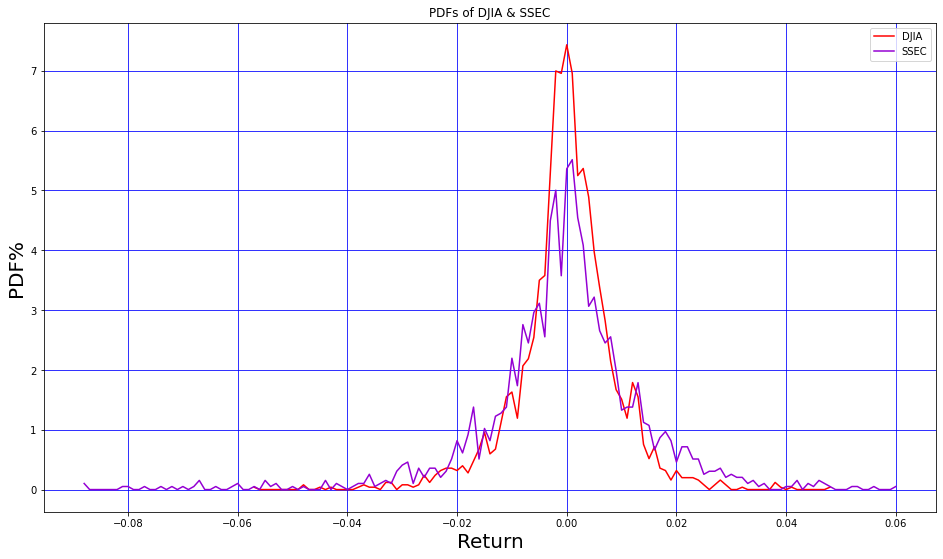

In [8]:
fig = plt.figure(figsize=(16,9))

PDF = simple_pdf(r,0.001)['simple_pdf']
PDF1 = simple_pdf(r1,0.001)['simple_pdf']
PDF2 = simple_pdf(r2,0.001)['simple_pdf']

xv = simple_pdf(r,0.001)['x_axis']
xv1 = simple_pdf(r1,0.001)['x_axis']
xv2 = simple_pdf(r2,0.001)['x_axis']

#plt.plot(xv, PDF*100,color='orange',label=r"S&P500")
plt.plot(xv1, PDF1*100,color='red',label=r"DJIA")
plt.plot(xv2, PDF2*100,color='darkviolet',label=r"SSEC")

plt.legend()
plt.xlabel('Return',size=20)
plt.ylabel('PDF%',size=20)
plt.title("PDFs of DJIA & SSEC")
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

### Volume PDF:

In [9]:
volume_markets = pd.read_excel('S&P500.xlsx', usecols="G")
volume_markets1 =pd.read_excel('DJIA.xlsx', usecols="G")
volume_markets2 =pd.read_excel('SSEC.xlsx', usecols="G")

In [10]:
def Volume(VolumeMarkets): 
    vol_ret=[]
    
    maxx = np.max(VolumeMarkets["Volume"].values)
   

    for i in range(1,len(VolumeMarkets.values)):
        vol_ret.append(VolumeMarkets["Volume"].values[i]/maxx)
    return vol_ret
   

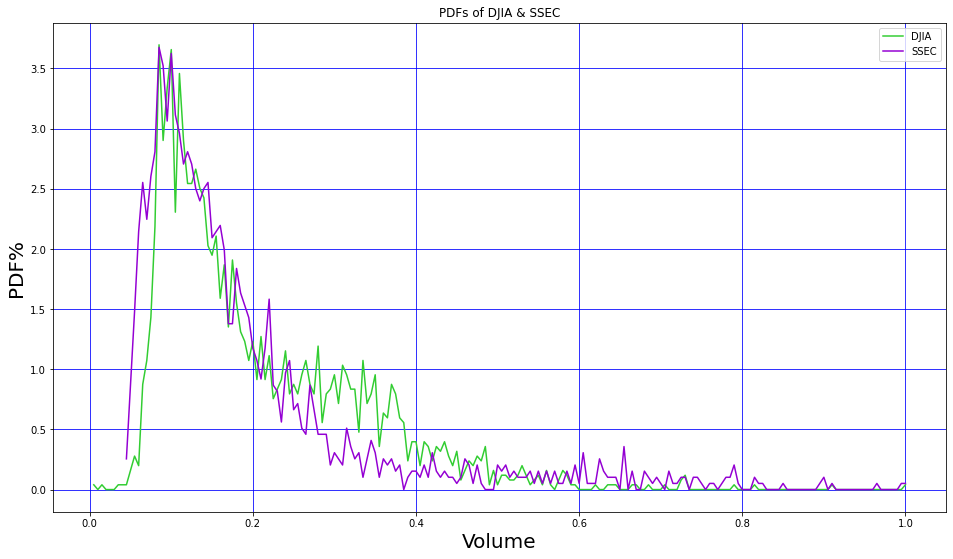

In [11]:
fig2 = plt.figure(figsize=(16,9))
PDF3 = simple_pdf(Volume(volume_markets),0.005)['simple_pdf']
PDF4 = simple_pdf(Volume(volume_markets1),0.005)['simple_pdf']
PDF5 = simple_pdf(Volume(volume_markets2),0.005)['simple_pdf']

xv3 = simple_pdf(Volume(volume_markets),0.005)['x_axis']
xv4 = simple_pdf(Volume(volume_markets1),0.005)['x_axis']
xv5 = simple_pdf(Volume(volume_markets2),0.005)['x_axis']

#plt.plot(xv3, PDF3*100,color='orange',label=r"S&P500")
plt.plot(xv4, PDF4*100,color='limegreen',label=r"DJIA")
plt.plot(xv5, PDF5*100,color='darkviolet',label=r"SSEC")

plt.legend()
plt.xlabel('Volume',size=20)
plt.ylabel('PDF%',size=20)
plt.title("PDFs of DJIA & SSEC")
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

### Definening a function for QP:

In [12]:
def quantum_pot1d2(pdf):
    sec_dev = np.zeros(len(pdf))
    for i in range(2,len(pdf)-2):
        sec_dev[i] = (pdf[i+2]+pdf[i-2] -2*pdf[i])/4

    Q = np.array(sec_dev)/np.array(pdf)

    return Q

<ipython-input-12-b2ace9728eb3>:6: RuntimeWarning: divide by zero encountered in true_divide
  Q = np.array(sec_dev)/np.array(pdf)
<ipython-input-12-b2ace9728eb3>:6: RuntimeWarning: invalid value encountered in true_divide
  Q = np.array(sec_dev)/np.array(pdf)


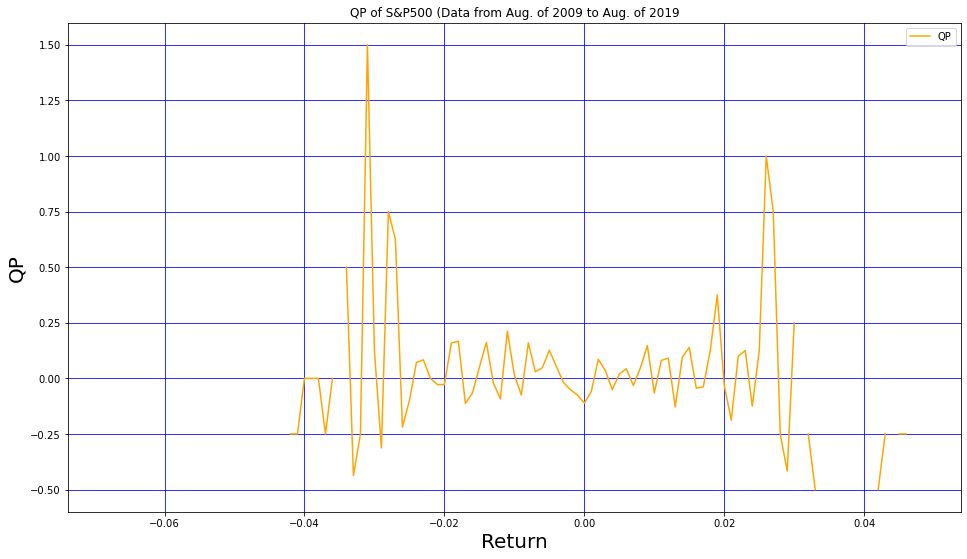

In [13]:
fig3 = plt.figure(figsize=(16,9))
plt.plot(xv,quantum_pot1d2(PDF),color='orange',label=r"QP")
plt.legend()
plt.xlabel('Return',size=20)
plt.ylabel('QP',size=20)
plt.title("QP of S&P500 (Data from Aug. of 2009 to Aug. of 2019")
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()


### QP absolute value cleaned for a better plot:

<ipython-input-14-7953ecda0b8b>:4: RuntimeWarning: divide by zero encountered in true_divide
  QP_INF_contained = second_derivative/pdf
<ipython-input-14-7953ecda0b8b>:4: RuntimeWarning: invalid value encountered in true_divide
  QP_INF_contained = second_derivative/pdf


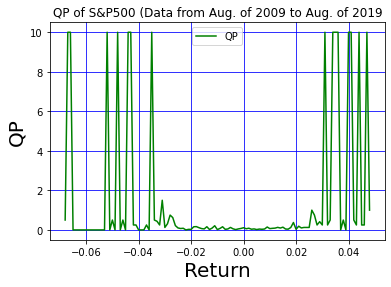

In [25]:
plt.plot(xv,quantum_potential(PDF),color='green',label=r"QP")
plt.legend()
plt.xlabel('Return',size=20)
plt.ylabel('QP',size=20)
plt.title("QP of S&P500 (Data from Aug. of 2009 to Aug. of 2019")
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

<ipython-input-26-7953ecda0b8b>:4: RuntimeWarning: divide by zero encountered in true_divide
  QP_INF_contained = second_derivative/pdf
<ipython-input-26-7953ecda0b8b>:4: RuntimeWarning: invalid value encountered in true_divide
  QP_INF_contained = second_derivative/pdf


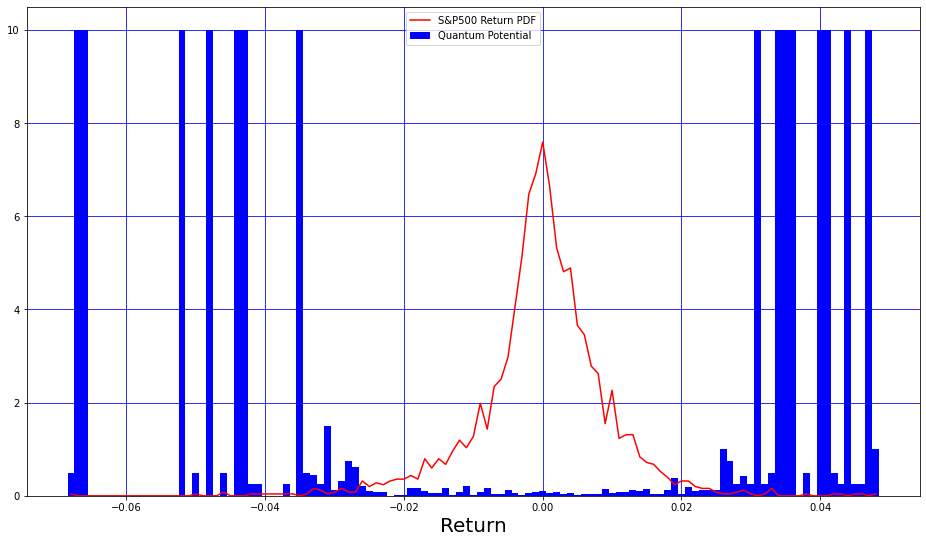

In [30]:
fig = plt.figure(figsize=(16,9))
PDF = simple_pdf(r,0.001)['simple_pdf']
xv = simple_pdf(r,0.001)['x_axis']
plt.plot(xv, PDF*100,color='red',label=r"S&P500 Return PDF")
plt.bar(xv, quantum_potential(PDF),width=0.001,color='blue',label=r"Quantum Potential")
plt.legend()
plt.xlabel('Return',size=20)
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

In [26]:
def quantum_potential(pdf):
    first_derivative = np.gradient(pdf)
    second_derivative = np.gradient(first_derivative)
    QP_INF_contained = second_derivative/pdf
    #all infs are positive I replaced them by 10
    QP_without_INF = np.nan_to_num(QP_INF_contained,posinf=10)
    #QP_AbsoluteValue
    QP = np.absolute(QP_without_INF)
    return QP


In [161]:
def Walls (qp):
    Infinities = np.where(qp == 10)

    value = np.zeros((len(Infinities[0]-1),2))
    for i in range (len(Infinities[0])-1):
        value[i][0] = (Infinities[0][i+1])-(Infinities[0][i])
        value[i][1] = Infinities[0][i+1]
    
    Width =  max([_[0] for _ in value])
    Width_index = max(value, key = itemgetter(0))[1]
    Width_index_1 = Width_index - Width
    
    return Infinities, Width, Width_index_1, Width_index       

<ipython-input-26-7953ecda0b8b>:4: RuntimeWarning: divide by zero encountered in true_divide
  QP_INF_contained = second_derivative/pdf
<ipython-input-26-7953ecda0b8b>:4: RuntimeWarning: invalid value encountered in true_divide
  QP_INF_contained = second_derivative/pdf


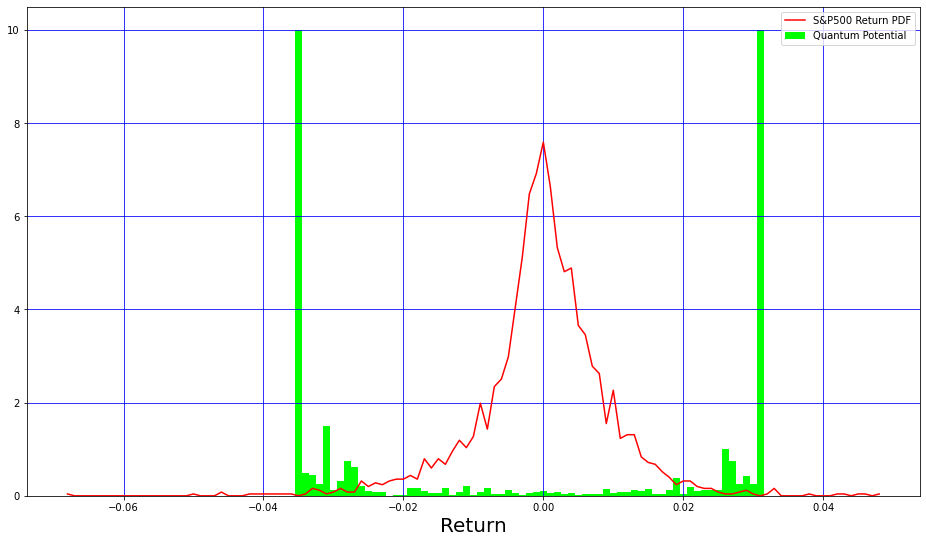

In [173]:
fig = plt.figure(figsize=(16,9))
PDF = simple_pdf(r,0.001)['simple_pdf']
xv = simple_pdf(r,0.001)['x_axis']
plt.plot(xv, PDF*100,color='red',label=r"S&P500 Return PDF")
plt.bar(xv[int(Walls(quantum_potential(PDF))[2]-1):int(Walls(quantum_potential(PDF))[3]+1)],\
        quantum_potential(PDF)[int(Walls(quantum_potential(PDF))[2]-1):int(Walls(quantum_potential(PDF))[3]+1)],\
        width=0.001,color='lime',label=r"Quantum Potential")
plt.legend()
plt.xlabel('Return',size=20)
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

<ipython-input-26-7953ecda0b8b>:4: RuntimeWarning: divide by zero encountered in true_divide
  QP_INF_contained = second_derivative/pdf
<ipython-input-26-7953ecda0b8b>:4: RuntimeWarning: invalid value encountered in true_divide
  QP_INF_contained = second_derivative/pdf


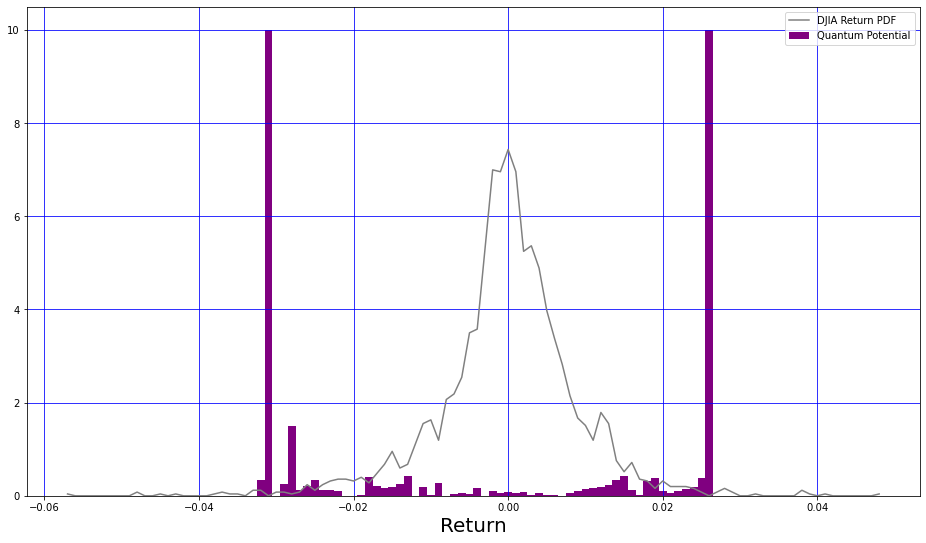

In [182]:
fig = plt.figure(figsize=(16,9))
PDF1 = simple_pdf(r1,0.001)['simple_pdf']
xv1 = simple_pdf(r1,0.001)['x_axis']
plt.plot(xv1, PDF1*100,color='gray',label=r"DJIA Return PDF")
plt.bar(xv1[int(Walls(quantum_potential(PDF1))[2]-1):int(Walls(quantum_potential(PDF1))[3]+1)],\
        quantum_potential(PDF1)[int(Walls(quantum_potential(PDF1))[2]-1):int(Walls(quantum_potential(PDF1))[3]+1)],\
        width=0.001,color='purple',label=r"Quantum Potential")
plt.legend()
plt.xlabel('Return',size=20)
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()

<ipython-input-26-7953ecda0b8b>:4: RuntimeWarning: divide by zero encountered in true_divide
  QP_INF_contained = second_derivative/pdf
<ipython-input-26-7953ecda0b8b>:4: RuntimeWarning: invalid value encountered in true_divide
  QP_INF_contained = second_derivative/pdf


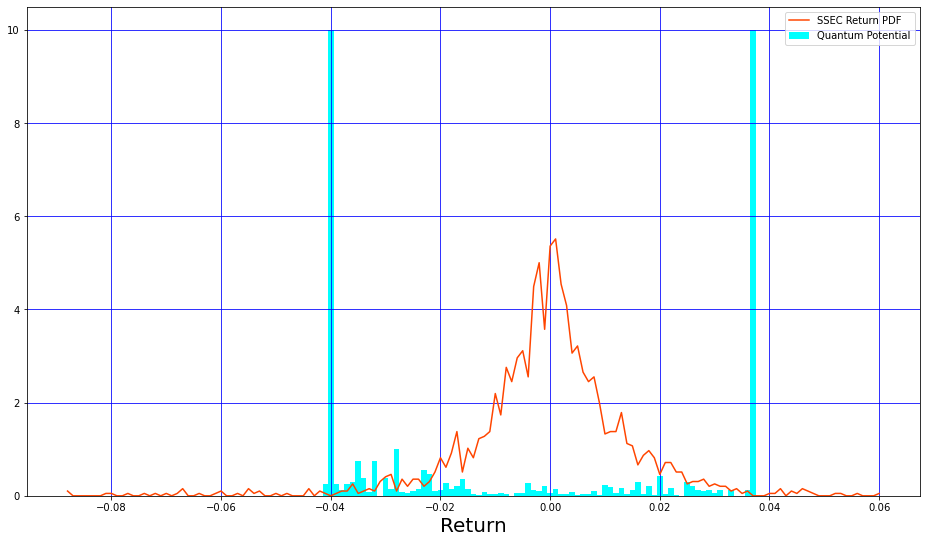

In [187]:
fig = plt.figure(figsize=(16,9))
PDF2 = simple_pdf(r2,0.001)['simple_pdf']
xv2 = simple_pdf(r2,0.001)['x_axis']
plt.plot(xv2, PDF2*100,color='orangered',label=r"SSEC Return PDF")
plt.bar(xv2[int(Walls(quantum_potential(PDF2))[2]-1):int(Walls(quantum_potential(PDF2))[3]+1)],\
        quantum_potential(PDF2)[int(Walls(quantum_potential(PDF2))[2]-1):int(Walls(quantum_potential(PDF2))[3]+1)],\
        width=0.001,color='cyan',label=r"Quantum Potential")
plt.legend()
plt.xlabel('Return',size=20)
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.show()